### Что делать

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

### Всякие графики к домашнему заданию

Сериал "Прослушка" пока не пересмотрен, но это не повод не порыться в сете с данными по преступности в Балтиморе, взял его здесь:

https://www.kaggle.com/sohier/crime-in-baltimore 

(потом в процессе понял, что есть более новый датасет на https://www.baltimorepolice.org/crime-stats/open-data — но оказалось, что там немного отличаются данные по годам и нет части того, что есть в первом. пытаться соединять не стал из-за неизбежных ошибок в данных, поэтому в итоге строил все на первом)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7
#тоже удобней оказалось, когда размер побольше

In [6]:
crime_df = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
crime_df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


In [7]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [8]:
#попробуем самую простую столбчатую диаграмму для разных типов преступлений

cr_barch = (crime_df
            .groupby('Description')[['Total Incidents']].count()
            .sort_values('Total Incidents', ascending=False)
            .reset_index()
)
cr_barch.head()

,Description,Total Incidents
0,LARCENY,60528
1,COMMON ASSAULT,45518
2,BURGLARY,42538
3,LARCENY FROM AUTO,36295
4,AGG. ASSAULT,27513


Text(0.5, 1.0, 'Crime in Baltimore 2012-2017')

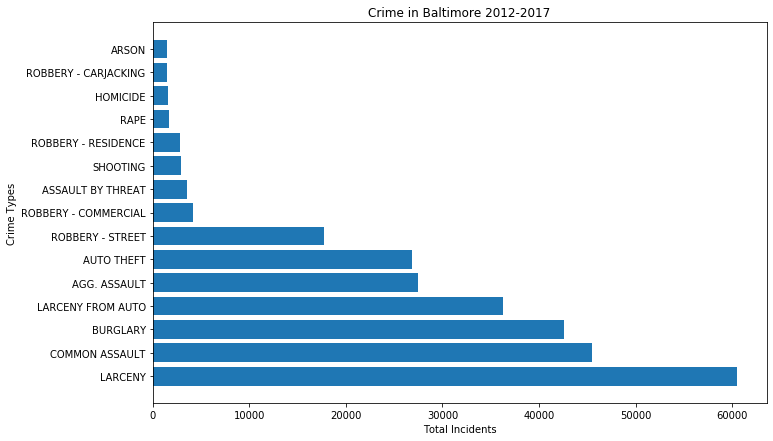

In [9]:
plt.barh(cr_barch['Description'], cr_barch['Total Incidents'])
plt.xlabel('Total Incidents')
plt.ylabel('Crime Types')
plt.title('Crime in Baltimore 2012-2017')

#предсказуемо видно, что обычные кражи сильно опережают все остальное (ну и кражи со взломом и из машины не так далеко)

In [10]:
#добавим графу с годами отдельно в датафрейм, чтобы посмотреть как что меняется с точностью до года

def get_year(df):
    
    y = re.search(r'\d{4}', df['CrimeDate'])
        
    if y:
        return y.group()

In [11]:
crime_df['Year'] = crime_df.apply(get_year, axis=1)
crime_df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,Year
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,2017
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,2017
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1,2017
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,2017
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1,2017


In [12]:
#допустим, попробуем тепловую карту, вдруг там интересно? тогда нужна кросс-таблица

crime_types_by_years = crime_df.pivot_table(
                        index='Year', 
                        columns='Description', 
                        values='Total Incidents', 
                        aggfunc=sum).fillna(0)

crime_types_by_years

Description,AGG. ASSAULT,ARSON,ASSAULT BY THREAT,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
Year,,,,,,,,,,,,,,,
2012,4870,242,688,3950,7876,9261,216,10767,7034,315,182,558,535,2712,369
2013,4605,274,636,4542,7464,8469,235,12047,6516,280,124,560,547,2870,402
2014,4260,215,509,4396,6869,7458,211,11098,6423,249,156,626,468,2662,369
2015,4758,286,553,5532,7826,6981,342,10309,6620,281,283,874,433,3127,636
2016,5112,263,637,5223,7356,7465,318,9829,6019,286,412,857,522,3782,668
2017,3908,184,480,3195,5147,5884,237,6478,3683,226,371,666,361,2538,466


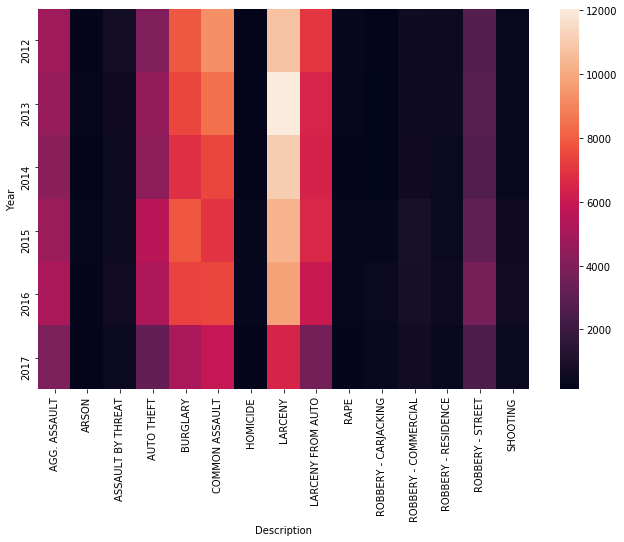

In [13]:
ax = sns.heatmap(crime_types_by_years)

#видим некоторый прирост уличных грабежей в 2016 и как будто общий спад краж в послеждние годы, 
#но особенной пищи для размышлений тут нет

In [14]:
#а если посмотреть по районам?

crime_types_by_districts = crime_df.pivot_table(
                        index='District', 
                        columns='Description', 
                        values='Total Incidents', 
                        aggfunc=sum).fillna(0)

crime_types_by_districts

Description,AGG. ASSAULT,ARSON,ASSAULT BY THREAT,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
District,,,,,,,,,,,,,,,
CENTRAL,2576,85,400,1745,2882,5208,104,8998,5795,197,149,502,195,2602,193
EASTERN,3201,132,283,1865,3155,5124,227,4388,2642,156,110,297,264,1346,445
NORTHEASTERN,3730,272,682,4995,7869,6858,206,8653,5069,244,205,666,498,2733,326
NORTHERN,2327,130,307,2765,5978,4121,117,7393,4980,192,179,587,324,2067,198
NORTHWESTERN,2786,185,404,3517,4748,4072,215,5808,3116,153,228,487,281,1756,305
SOUTHEASTERN,3253,101,443,2650,5227,6213,95,9336,6709,170,148,598,303,2881,164
SOUTHERN,3420,196,324,3040,5231,5231,133,7183,3724,202,170,424,425,1802,345
SOUTHWESTERN,2985,216,342,3385,4569,4295,208,4872,2505,164,166,349,305,1316,415
WESTERN,3226,147,318,2868,2876,4373,254,3883,1744,158,170,230,270,1182,519


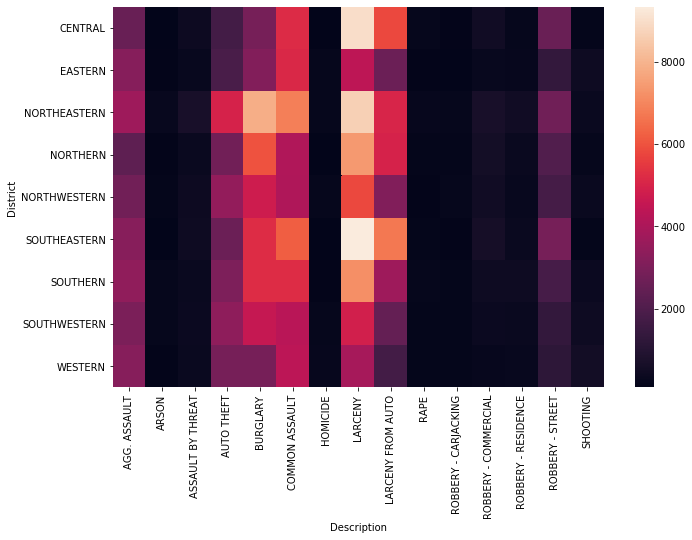

In [15]:
sns.heatmap(crime_types_by_districts)

#уже хоть как-то поинтересней — видно, что северо-восток и юго-восток города в целом более криминальные места, чем другие районы
#самым благополучным тут смотрится Запад Балтимора 

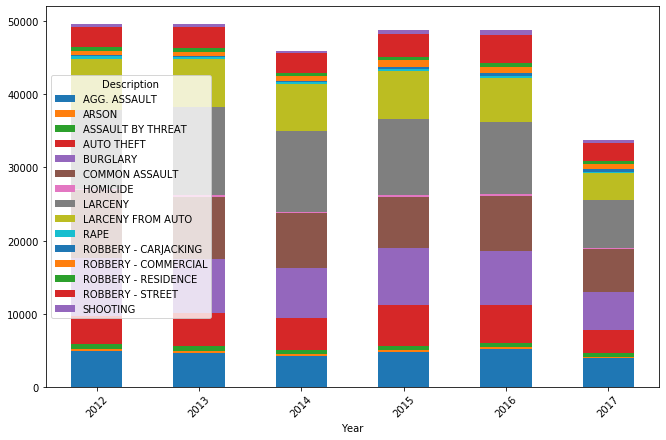

In [17]:
#а вот по отдельным районам (а их 278) такую карту не выстроишь, нужно что-то другое придумывать 

#вернемся к разбивке по типам преступлений и по годам — может быть, здесь поможет барчарт с накоплением? 

crime_types_by_years.plot(kind='bar', rot=45, stacked=True)

#это, в отличие от тепловой карты, хотя бы можно как-то воспринимать, но все так ровненько, что особых выводом сделать сложно
#но видно, что в 2014 почему-то в целом меньше преступлений, а с 2017 — резко меньше (скорее всего, неполные данные за год)
#вообще для стольких вариаций явно не очень удачный выбор барчарта — даже цвета начинают повторяться 
#(долго глядел на аномально большой кусок с шутингами, пока не понял, в чем дело)

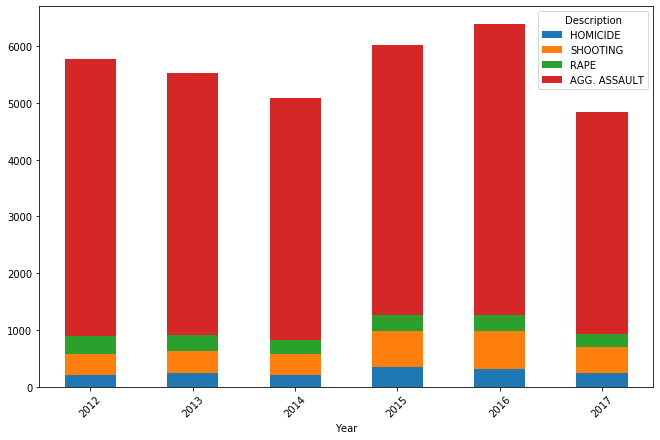

In [18]:
#все-таки построим что-то более симпатичное из насильственных преступлений против человека, 
# кажется, aggravated assault это довольно широкое понятие, поэтому преобладает. 
#Довольно заметный рост числа шутингов и вроде бы убийств в 2015 и 2016

crime_types_by_years[['HOMICIDE', 'SHOOTING', 'RAPE', 'AGG. ASSAULT']].plot(kind='bar', rot=45, stacked=True)

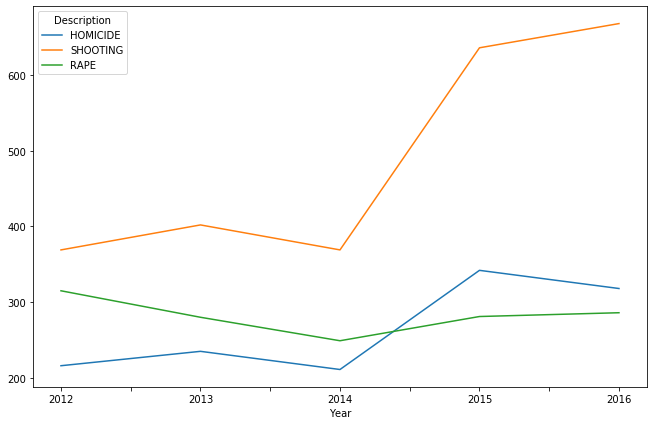

In [19]:
#проверим этот рост шутингов и убийств на другом графике 
#(и выкинем данные за 2017, потому что с ними явно что-то не то — они ограничены сентябрем)
#тут рост убийств и шутингов вполне заметен 

crime_types_by_years1 = crime_types_by_years.loc[(crime_types_by_years.index != '2017')]

crime_types_by_years1[['HOMICIDE', 'SHOOTING', 'RAPE']].plot()

Тут пришлось отвлечься, потому что график навел на мысль, что где-то слышал, что вообще проблема gun violence в сша растет с каждым годом — и тут как раз попался на глаза датасет за 2013-2018, быстренько попробую такой же график по годам общий построить

данные взял отсюда: https://www.kaggle.com/jameslko/gun-violence-data 

In [20]:
gun_violence_data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
gun_violence_data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [21]:
gun_violence_data.rename(columns={'date': 'CrimeDate'}, inplace=True) #новое имя чтоб функцию применить
gun_violence_data['Year'] = gun_violence_data.apply(get_year, axis=1)
gun_violence_data.head()

,incident_id,CrimeDate,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,Year
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013


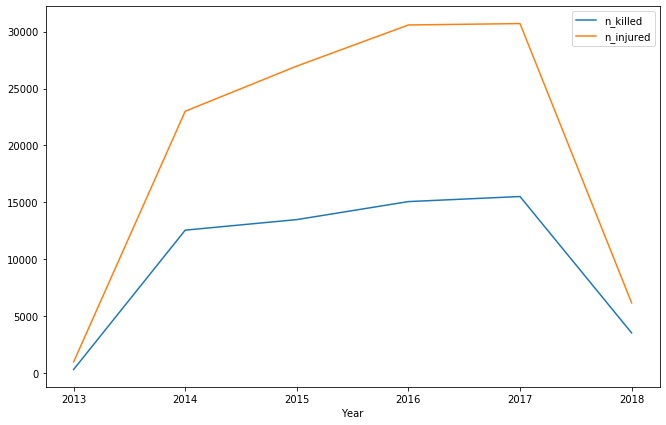

In [22]:
# ну в общем, на первый взгляд и правда по этим данным видим постепенный рост такой стрельбы 
#(данные за 2013 и 2017 понятное дело, скорее всего и тут неполные)

gun_violence_data.groupby('Year')[['n_killed', 'n_injured']].sum().plot()

In [23]:
# но вернемся к первому набору данных из Балтимора — вот что интересно там, орудие преступления
#запомнил, что так делать плохо, но все-таки сделал датафрейм только из преступлений с оружием и где указан район

crime_df_weapon = crime_df[['Year', 'Weapon', 'District', 'Neighborhood']].dropna()
print(crime_df_weapon.shape)

(94678, 4)


In [24]:
crime_df_weapon.head()

,Year,Weapon,District,Neighborhood
0,2017,KNIFE,SOUTHERN,Brooklyn
2,2017,FIREARM,NORTHERN,Winston-Govans
3,2017,OTHER,SOUTHERN,Carrollton Ridge
4,2017,HANDS,CENTRAL,Downtown West
6,2017,FIREARM,SOUTHEASTERN,Canton


In [25]:
weapon_pie = crime_df_weapon.groupby('Weapon')[['Year']].count()
weapon_pie.rename(columns={'Year': 'Count'}, inplace=True)
weapon_pie.sort_values(by='Count', ascending=True)
weapon_pie

,Count
Weapon,
FIREARM,22176
HANDS,48483
KNIFE,9548
OTHER,14471


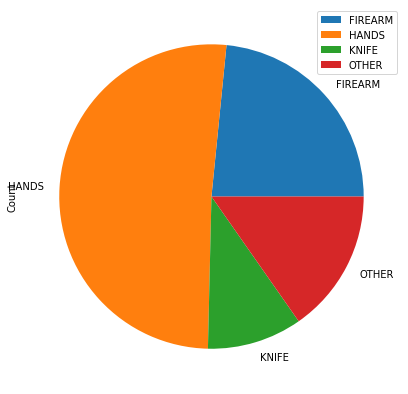

In [26]:
#кругляшок красивый, но малоинформативный, разве что видно, что преступлений с огнестрельным оружием почти четверть, 
#куда больше ножей и всего остального — в России, например, его доля явно была бы ниже (интересно проверить)

weapon_pie.plot(kind='pie', y='Count')

In [27]:
#
district_pie = crime_df.groupby(['District'])[['Total Incidents']].sum().sort_values('Total Incidents')
district_pie.head()

,Total Incidents
District,
WESTERN,22218
EASTERN,23635
SOUTHWESTERN,26092
NORTHWESTERN,28061
CENTRAL,31631


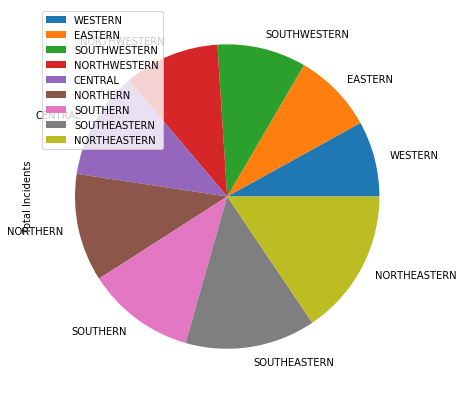

In [28]:
# ладно, придется признать, что вышло достаточно бесполезно 

district_pie.plot(kind='pie', y='Total Incidents')

In [29]:
# попробую что-то сделать с plotly из этого — может быть, если не полезно получится, то хотя бы красиво 

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [30]:
districts_total = crime_df.groupby(['District'])[['Total Incidents']].sum().sort_values('Total Incidents')
districts_total.head(10)

,Total Incidents
District,
WESTERN,22218
EASTERN,23635
SOUTHWESTERN,26092
NORTHWESTERN,28061
CENTRAL,31631
NORTHERN,31665
SOUTHERN,31850
SOUTHEASTERN,38291
NORTHEASTERN,43006


In [31]:
districts_line_plot = crime_df.pivot_table(
                        index='Year', 
                        columns='District', 
                        values='Total Incidents', 
                        aggfunc=sum).fillna(0)
districts_line_plot

District,CENTRAL,EASTERN,NORTHEASTERN,NORTHERN,NORTHWESTERN,SOUTHEASTERN,SOUTHERN,SOUTHWESTERN,WESTERN
Year,,,,,,,,,
2012,6496,4235,7728,5586,4886,6580,5796,4440,3812
2013,5656,4135,7838,5741,5324,6983,5581,4265,4035
2014,5034,3661,7513,5320,4703,6427,5213,4357,3728
2015,5317,4098,7723,5948,4778,7105,5224,4620,4007
2016,5700,4275,6882,5409,4937,6686,6001,4767,4079
2017,3428,3231,5322,3661,3433,4510,4035,3643,2557


In [32]:
trace0 = go.Scatter(
    x=districts_line_plot.index,
    y=districts_line_plot['CENTRAL'],
    name='CENTRAL'
)

trace1 = go.Scatter(
    x=districts_line_plot.index,
    y=districts_line_plot['EASTERN'],
    name='EASTERN'
)

trace2 = go.Scatter(
    x=districts_line_plot.index,
    y=districts_line_plot['NORTHEASTERN'],
    name='NORTHEASTERN'
)

trace3 = go.Scatter(
    x=districts_line_plot.index,
    y=districts_line_plot['NORTHERN'],
    name='NORTHERN'
)


trace4 = go.Scatter(
    x=districts_line_plot.index,
    y=districts_line_plot['NORTHWESTERN'],
    name='NORTHWESTERN'
)

trace5 = go.Scatter(
    x=districts_line_plot.index,
    y=districts_line_plot['SOUTHEASTERN'],
    name='SOUTHEASTERN'
)

trace6 = go.Scatter(
    x=districts_line_plot.index,
    y=districts_line_plot['SOUTHERN'],
    name='SOUTHERN'
)

trace7 = go.Scatter(
    x=districts_line_plot.index,
    y=districts_line_plot['SOUTHWESTERN'],
    name='SOUTHWESTERN'
)

trace8 = go.Scatter(
    x=districts_line_plot.index,
    y=districts_line_plot['WESTERN'],
    name='WESTERN'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8]
layout = {'title': 'Baltimor Crime'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

#в общем, тут наконец-то как-то лучше видно, какие районы самые (не)благополучные в плане преступности в целом 
#куда понятней, чем на круговом пироге

In [33]:
#ну это я сначала руками написал замучался, потом сообразил, что функция есть и даже готовая в ноутбуке с лекции
#правда, не понял, почему отобразилось в окне со скроллом

def plotly_line_plot(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [34]:
plotly_line_plot(districts_line_plot, title = 'Baltimor')